In [127]:
import eagleSqlTools as est
import numpy as np
import matplotlib.colors
import astropy.units as u
from astropy.coordinates import SkyCoord, CartesianRepresentation
import matplotlib.pyplot as plt
import healpy as hp
from mpl_toolkits import mplot3d
import random

In [128]:
conn = est.connect("lzm898", "YB854nic", "http://virgodb.dur.ac.uk:8080/MyMillennium")

In [129]:
##Let us do another constraint, mstars_bulge+mstars_disk>=10^7

In [130]:
query3="SELECT gal.x, gal.y, gal.z, halo.m200_crit FROM McAlpine2022a..galaxy as gal, McAlpine2022a..halo as halo WHERE mstars_disk+mstars_bulge >1e7 AND gal.hosthaloid=halo.hosthaloid AND gal.rank=0"

In [131]:
#check
query="SELECT gal.x, gal.y, gal.z, halo.m200_crit, dist FROM McAlpine2022a..galaxy as gal, McAlpine2022a..halo as halo WHERE mstars_disk+mstars_bulge >1e11 AND gal.hosthaloid=halo.hosthaloid AND gal.rank=0 and galaxyid=5098129"

In [132]:
res3=est.execute_query(conn, query3)

In [133]:
print(res3)

[(  42.863495,   34.922943,  49.966003, 1.26532990e+08)
 (  96.72165 ,  -33.631012, -48.072296, 1.72544987e+08)
 ( 106.68912 , -100.27698 , -77.161865, 1.72544987e+08) ...
 (-120.69644 , -100.5842  ,  71.47815 , 6.24612852e+09)
 (-109.24692 , -117.356964,  45.494446, 6.24612852e+09)
 ( -59.711517,  -42.37439 ,  24.760193, 6.24612852e+09)]


In [134]:
np.save('res3.npy', res3)

In [135]:
xyzm3_1 = np.load('res3.npy')

In [136]:
xyzm3=sorted(xyzm3_1, key=lambda x:np.sqrt(x[0]**2+x[1]**2+x[2]**2))

In [137]:
s3=len(xyzm3)

In [161]:
xyzm3test=sorted(xyzm3_1, key=lambda x:x[3])

In [162]:
for i in reversed(range(s3-10000,s3)):
    print(xyzm3test[i])

(41.14615, 40.16696, 51.539795, 2.72129554e+15)
(-36.69644, -101.4426, 91.63727, 1.88646213e+15)
(-70.37393, -132.009, 45.6933, 1.78475497e+15)
(-12.160278, -35.135803, -63.892365, 1.72400982e+15)
(-89.57449, -26.980255, 54.299988, 1.26793751e+15)
(-92.98135, 4.4966125, 38.07831, 1.17302846e+15)
(156.97025, 88.90457, -1.982666, 1.15342041e+15)
(-31.80838, 96.163605, -75.74875, 8.9899818e+14)
(-132.91754, 28.649323, 79.374084, 8.29722357e+14)
(-99.57123, -120.23401, 19.806213, 8.26173441e+14)
(101.07803, 71.180695, 78.77002, 8.23029798e+14)
(80.24539, -80.622375, -142.35596, 7.8916307e+14)
(-119.148926, -64.37955, -85.837585, 7.78314224e+14)
(-100.93472, -143.45032, 19.518066, 7.69742706e+14)
(-107.30356, -132.20193, 17.282532, 7.45683908e+14)
(108.18515, -99.31619, -65.02905, 7.20999633e+14)
(-127.039154, -74.858765, -76.13165, 7.14087573e+14)
(-55.692566, 66.25583, -119.58118, 7.12413059e+14)
(-162.36185, -70.599365, -87.04071, 6.52571121e+14)
(71.88345, 66.387726, 96.777466, 6.138928

(-129.24588, -70.6658, -82.280304, 4.28718732e+13)
(116.74802, -101.89569, 49.37091, 4.28359264e+13)
(24.854828, 162.36215, 18.902771, 4.28013023e+13)
(155.68948, 61.637848, -30.50885, 4.27781008e+13)
(-72.52789, 10.318817, 185.13196, 4.273493e+13)
(140.84286, -23.362213, 117.61865, 4.27101411e+13)
(-118.11246, -12.977325, 33.322693, 4.26919778e+13)
(7.510742, -61.531677, -160.06964, 4.26051532e+13)
(-1.3383484, 100.6644, -67.05432, 4.25699425e+13)
(-168.41501, 38.25937, -6.5400085, 4.2562339e+13)
(-25.314392, -61.20288, 126.81464, 4.25485124e+13)
(-93.88309, -49.633057, 14.457947, 4.24823817e+13)
(-93.78238, 1.3396301, 19.70868, 4.24760435e+13)
(-88.053406, -8.348267, -166.98972, 4.24498512e+13)
(76.16757, -78.51495, -33.79239, 4.24192187e+13)
(121.98471, -119.52881, -62.93051, 4.23088935e+13)
(-94.079346, -111.48291, 27.807007, 4.22771912e+13)
(-9.020447, -82.35495, -167.77356, 4.22617082e+13)
(-0.5607605, -89.47446, -41.106293, 4.22476285e+13)
(-3.50943, -125.67279, -152.92151, 4.22

(-143.21738, 26.440277, 100.05914, 2.63993715e+13)
(-29.522156, 6.428711, 162.55322, 2.63827381e+13)
(55.037872, 111.75644, -26.436127, 2.63409937e+13)
(163.55124, 3.961853, 34.5791, 2.63277998e+13)
(-80.176544, 66.07718, -117.8486, 2.63191726e+13)
(112.19614, 163.77951, 11.045563, 2.63150545e+13)
(56.49234, 172.05673, -57.744415, 2.63014924e+13)
(46.99643, 23.196625, -70.743866, 2.62893338e+13)
(-6.866333, 81.31442, 71.28595, 2.62826735e+13)
(-98.45871, 15.361298, 113.25897, 2.62778308e+13)
(-63.67392, 171.2797, -44.29428, 2.625387e+13)
(-89.811676, -40.41986, -20.502533, 2.62225013e+13)
(89.26492, 81.78989, -2.9329224, 2.62085022e+13)
(25.752533, 26.365875, -116.094696, 2.61910406e+13)
(-131.80896, 13.693817, -145.58661, 2.61715431e+13)
(97.15427, 11.666473, 136.66602, 2.61215165e+13)
(111.10153, -63.27301, 113.378174, 2.61178701e+13)
(-62.089874, -0.8530884, -118.783844, 2.60933687e+13)
(-138.36792, 78.6702, -11.243439, 2.60924599e+13)
(54.149567, 102.33151, 99.40326, 2.60863634e+13

(-130.82678, -117.33206, 44.817383, 1.77153203e+13)
(98.693695, 72.25528, 55.155457, 1.77131578e+13)
(158.15591, -34.67572, 48.603577, 1.77100404e+13)
(-49.232147, 25.668915, 152.58417, 1.77091777e+13)
(38.44113, 139.82352, -72.76486, 1.77012061e+13)
(-50.28186, 61.5831, -111.82083, 1.76979968e+13)
(-33.320953, -143.61441, 88.723145, 1.769098e+13)
(-92.056274, 169.83493, 50.75537, 1.76730468e+13)
(-45.35742, -0.54693604, 13.704895, 1.76680315e+13)
(-94.14923, 131.14816, -8.098724, 1.76653283e+13)
(70.30533, -16.03067, -174.20062, 1.76594963e+13)
(-120.39148, -115.13272, 58.23352, 1.76550101e+13)
(107.36966, -2.8333435, -0.6479187, 1.7642978e+13)
(-66.44083, -90.255554, 130.35535, 1.76428744e+13)
(-59.34308, -36.205017, -35.46054, 1.76326023e+13)
(153.18832, 57.55893, -27.259888, 1.76265632e+13)
(-43.947845, 82.330475, -64.94806, 1.76195233e+13)
(90.12332, -5.677002, 117.14917, 1.76059613e+13)
(-34.841187, 68.38974, -42.54431, 1.75830703e+13)
(-144.94122, 27.241547, 77.01935, 1.75786532

(-7.362549, -178.57794, -87.16736, 1.57142931e+13)
(-22.926636, 82.09329, 141.90076, 1.57124871e+13)
(8.164734, -66.59787, -146.51291, 1.57116359e+13)
(-96.109985, 94.86459, 35.79132, 1.57022955e+13)
(-90.14087, -2.1865234, 176.58752, 1.57021114e+13)
(-115.50867, 13.908173, -128.19272, 1.57004435e+13)
(-89.08356, 75.4783, -147.28046, 1.56999834e+13)
(75.58865, 12.123749, 0.77471924, 1.56721346e+13)
(-78.857605, -20.648834, 127.69324, 1.56718355e+13)
(79.51822, 102.80759, 2.8276672, 1.56608272e+13)
(91.56473, 127.46146, 21.010254, 1.56595158e+13)
(-96.375275, 17.231781, 77.68103, 1.56558119e+13)
(-22.598877, 93.14694, -50.701782, 1.56552137e+13)
(134.91916, -70.286255, 38.53125, 1.56543855e+13)
(-93.246796, -27.275696, -90.38028, 1.56507505e+13)
(27.266815, -34.38434, -50.685608, 1.56498303e+13)
(88.79581, 13.8246765, 151.96503, 1.56385343e+13)
(-12.050201, -52.20569, -169.94836, 1.56316671e+13)
(-70.49664, -100.27054, -7.3561096, 1.56312299e+13)
(124.125824, -9.220551, -86.10098, 1.562

(-101.02695, -2.1865845, -105.48239, 1.39328236e+13)
(-18.709198, 57.88095, -142.37042, 1.39204809e+13)
(-39.02011, 137.37833, 5.3626404, 1.39083798e+13)
(-84.25809, -84.09793, 8.289612, 1.39051934e+13)
(-60.559784, 149.97354, -72.60599, 1.39010063e+13)
(97.49948, -41.177917, 73.37378, 1.38989128e+13)
(-91.31976, -34.12082, 37.946533, 1.38896069e+13)
(0.67959595, 191.4584, -34.642242, 1.38889972e+13)
(38.32315, -31.908112, -133.2869, 1.38816238e+13)
(95.14255, -60.797882, 145.19238, 1.38762519e+13)
(20.735443, -132.7569, 129.09802, 1.38654506e+13)
(-68.558624, -31.993286, -27.727112, 1.38572374e+13)
(-108.14551, -79.045166, 70.80347, 1.38535795e+13)
(-191.89462, 36.377106, 6.6169434, 1.38501976e+13)
(29.316742, 119.00424, 17.75409, 1.38442275e+13)
(-20.861633, 71.23398, 153.88306, 1.38396493e+13)
(60.516327, 15.498505, -97.75571, 1.38354507e+13)
(154.65872, -60.312866, 30.101318, 1.38285719e+13)
(125.280365, -60.796417, -58.68347, 1.38166203e+13)
(20.083954, 98.840485, 73.89526, 1.3814

(63.75882, -93.13931, 140.47473, 1.13811478e+13)
(-64.35806, 142.92111, 111.163635, 1.13716119e+13)
(171.15128, 96.58945, -28.269165, 1.13657108e+13)
(-88.68204, -27.087097, 117.05853, 1.13521718e+13)
(-131.43927, 56.60544, 117.64032, 1.13508604e+13)
(106.96701, -51.690796, 142.39716, 1.13475131e+13)
(-16.65091, 145.76352, 88.372314, 1.1345178e+13)
(-38.066895, -18.2406, -27.761963, 1.13384142e+13)
(-20.792053, -8.054596, -18.74173, 1.13296719e+13)
(-90.50946, 23.127289, 79.897705, 1.13288782e+13)
(76.95688, -134.35776, -64.40344, 1.13275324e+13)
(-66.55429, 118.599945, 20.858337, 1.13275209e+13)
(35.498505, -91.120544, 76.88873, 1.13271413e+13)
(69.4653, 176.34018, -45.885864, 1.13270147e+13)
(9.466644, 111.97482, -74.58447, 1.13235523e+13)
(-40.29117, 107.04385, 47.179504, 1.13171912e+13)
(-27.021423, -65.726776, -85.45914, 1.13168116e+13)
(-11.471497, 105.155, -84.10095, 1.13152587e+13)
(-51.256927, -7.885498, 192.6576, 1.13149596e+13)
(64.22269, -37.431152, -19.107208, 1.13124404e+

(-47.420837, 143.77719, 3.457489, 9.43362108e+12)
(-79.88852, -29.055573, -171.6908, 9.43303442e+12)
(-111.02194, 142.31229, -20.118378, 9.43226372e+12)
(97.90469, 7.2903748, 44.616272, 9.42891635e+12)
(136.06137, 45.06961, 43.90454, 9.42748998e+12)
(86.37332, 92.92648, -27.433014, 9.4264432e+12)
(163.75711, 36.319, 27.1792, 9.42628216e+12)
(137.46085, 121.01846, -6.592743, 9.42585655e+12)
(105.34244, -25.094452, -90.38028, 9.42576453e+12)
(53.224213, 170.40909, -82.32019, 9.42109431e+12)
(79.891266, -50.328644, 97.3371, 9.41927684e+12)
(142.24832, -83.416504, -36.387238, 9.41841411e+12)
(-110.482605, -120.4707, 13.169983, 9.41834509e+12)
(10.128876, 36.00589, -6.16568, 9.40907368e+12)
(-61.55954, -60.082764, -47.7612, 9.40731372e+12)
(-41.760803, 50.29727, 156.63165, 9.40670406e+12)
(-1.4289551, 102.315704, -107.705505, 9.39822635e+12)
(-68.187775, 110.555145, -60.737213, 9.39812282e+12)
(-35.56839, 72.691986, 129.06256, 9.39706455e+12)
(-54.811157, 56.220184, 84.08844, 9.39662743e+12

(169.33737, -91.187836, -42.281494, 8.0820877e+12)
(16.301483, 78.39017, 18.331848, 8.08206469e+12)
(-25.655731, -77.629364, -98.21506, 8.08028173e+12)
(75.64975, 116.26047, -19.374603, 8.07992513e+12)
(-65.14987, 130.46024, -31.912903, 8.07921195e+12)
(68.148834, 154.74258, -26.59613, 8.07841824e+12)
(-127.08615, 63.113556, 41.14258, 8.07505937e+12)
(-58.679596, 38.361786, -67.280365, 8.07448422e+12)
(14.347656, -178.67618, -2.514618, 8.07308085e+12)
(-99.66876, 79.92703, -151.00742, 8.07034314e+12)
(-134.59988, -65.90338, -86.95746, 8.06770895e+12)
(20.979584, 170.66837, 32.99872, 8.06622506e+12)
(-134.961, 18.674103, 74.49475, 8.06294671e+12)
(-100.459045, 43.980255, 27.04132, 8.06171589e+12)
(-38.475433, 127.56375, -87.91467, 8.06127877e+12)
(101.38565, -54.093903, 143.51031, 8.05988691e+12)
(2.0097656, -103.95651, -1.9298096, 8.05787389e+12)
(-113.53317, 22.750702, -21.208466, 8.05444599e+12)
(-161.11948, -74.01611, -77.803314, 8.05320367e+12)
(105.10611, 93.70883, 83.3952, 8.0522

(-22.829712, 20.98349, -5.5259094, 7.22098469e+12)
(-80.14896, -107.43231, 85.14838, 7.2206511e+12)
(-149.1434, -91.898865, 48.019714, 7.2198804e+12)
(-35.33734, 72.03909, 9.355194, 7.21647551e+12)
(-83.48538, 146.82974, -46.710083, 7.21625696e+12)
(-30.759796, 20.228302, -53.20221, 7.21525619e+12)
(-46.23587, -92.61804, -25.30008, 7.21517567e+12)
(-27.038727, 147.814, -65.53824, 7.21437046e+12)
(101.8555, 109.58481, 91.311646, 7.21397936e+12)
(61.24759, 23.111237, 54.319946, 7.2133697e+12)
(130.9744, 117.183075, -41.59317, 7.21308213e+12)
(-171.37112, 45.258392, 13.491455, 7.21266802e+12)
(-35.571747, -116.88599, 114.31793, 7.21248397e+12)
(117.34213, 69.471466, -41.0188, 7.21089656e+12)
(-11.674866, -18.13144, 159.23944, 7.21019487e+12)
(-182.79926, 74.12216, 14.871399, 7.21011435e+12)
(-190.9137, -18.25708, 54.544434, 7.20919411e+12)
(-60.140564, 77.15903, 151.1413, 7.20828538e+12)
(-24.392822, -120.61615, -14.583191, 7.20823936e+12)
(-5.8822937, -32.834625, 190.03766, 7.20358065e+1

(104.43222, 34.975555, 1.8633728, 6.38279565e+12)
(-69.04172, 60.993683, 65.909424, 6.38116223e+12)
(-2.0944214, 46.453827, -157.81482, 6.3795173e+12)
(-26.771912, -71.63739, 106.96271, 6.37794139e+12)
(-129.38962, -7.278351, -13.014832, 6.37343221e+12)
(-23.752625, 137.51523, -85.46942, 6.37199434e+12)
(-89.83182, 59.361725, -95.966156, 6.37079802e+12)
(108.510956, 126.5488, -20.055542, 6.3706945e+12)
(51.414093, -18.102234, -176.73663, 6.37021137e+12)
(-42.195618, 57.043427, 171.49487, 6.37018836e+12)
(117.72165, 32.509613, 62.57373, 6.36988929e+12)
(-19.446075, -147.5427, -89.61084, 6.36904957e+12)
(138.31161, 11.117889, 121.53119, 6.36815233e+12)
(34.498627, 48.77835, 42.1026, 6.36807181e+12)
(92.7706, 49.815155, -53.423065, 6.3676232e+12)
(26.510834, -40.566376, 39.6911, 6.36667995e+12)
(-112.00772, -123.096436, 66.29071, 6.36566769e+12)
(9.761993, 90.16104, -10.239777, 6.36464392e+12)
(-115.80325, -45.895935, 78.95923, 6.36401125e+12)
(25.45047, -71.187225, -47.721252, 6.36158412

(2.72052, 18.260712, 54.96582, 5.68833659e+12)
(-16.128235, 20.458832, 45.693848, 5.68822156e+12)
(-108.14194, 82.77768, -58.92505, 5.68781895e+12)
(-89.66669, -133.69907, 24.685974, 5.6872438e+12)
(139.97293, 60.56595, 49.684875, 5.6864731e+12)
(65.70065, -82.90228, -74.978546, 5.68600148e+12)
(78.37979, -79.322296, -122.536804, 5.68563338e+12)
(151.12692, -9.969574, -9.67395, 5.68561038e+12)
(55.23654, -134.17807, 38.084534, 5.68543783e+12)
(29.145844, 174.28549, -9.799774, 5.68516176e+12)
(111.05557, 104.56235, -23.668396, 5.68503523e+12)
(-104.218506, -6.1019897, 126.79059, 5.68477066e+12)
(-14.823669, 9.139557, -79.45175, 5.6841495e+12)
(2.5830994, 46.100983, -160.39313, 5.68362036e+12)
(-37.487762, 66.84256, 178.59003, 5.68267711e+12)
(-114.819244, -136.16174, 25.56366, 5.67969784e+12)
(12.427124, 172.246, 28.531067, 5.67965182e+12)
(-13.049988, -34.693726, 107.597595, 5.67923772e+12)
(21.328156, -79.07709, 132.53479, 5.67904217e+12)
(-15.148865, -160.71017, 105.22937, 5.67805291

(-183.52148, -43.184723, 40.17456, 5.18765705e+12)
(-74.16397, 28.255157, -105.39047, 5.1870819e+12)
(26.438263, 149.52603, 121.45813, 5.18693236e+12)
(123.21512, 41.07968, -70.22247, 5.18662178e+12)
(-87.763245, 169.95084, 57.848694, 5.18648374e+12)
(-55.743988, -2.5536194, -75.58612, 5.18627669e+12)
(1.3035889, 98.06528, -112.943726, 5.18582807e+12)
(17.105377, -66.153595, -135.0268, 5.18489633e+12)
(-166.33331, 47.866608, -6.2721863, 5.18449372e+12)
(91.656586, 101.46347, 49.870544, 5.18333192e+12)
(70.06644, 36.283478, 58.297607, 5.18311336e+12)
(-133.4028, -60.093964, -72.846436, 5.18273377e+12)
(-65.98328, 66.58835, 46.64325, 5.18015709e+12)
(-84.76578, 25.88797, 72.515076, 5.18005357e+12)
(103.23624, 74.426605, 79.21246, 5.17991553e+12)
(-29.567993, -28.166931, 18.457336, 5.17922535e+12)
(-91.80481, -36.072815, 31.811157, 5.17875373e+12)
(-50.92285, 120.43619, -74.31589, 5.17859269e+12)
(53.52292, -47.418304, -126.0058, 5.17772996e+12)
(-112.82379, 28.684784, 13.867065, 5.177718

(-119.22293, -69.81369, 77.97571, 4.69079651e+12)
(-8.351898, 46.003143, -121.195984, 4.69069298e+12)
(53.778168, 162.95969, -36.63797, 4.69049743e+12)
(112.77652, 34.43802, 114.38678, 4.68968071e+12)
(60.588043, -34.60031, 55.590332, 4.68935863e+12)
(143.20499, 37.314056, -44.16742, 4.6892436e+12)
(-3.4135437, -122.745514, -17.45343, 4.68895603e+12)
(-71.11069, 63.918915, -113.01718, 4.68871446e+12)
(3.0734253, 81.7283, -156.23099, 4.68756416e+12)
(-70.71237, 72.12717, -141.96713, 4.68685098e+12)
(130.06296, 132.72037, -45.040375, 4.68682797e+12)
(10.522369, 120.33237, -95.33569, 4.68667843e+12)
(-41.50708, -39.44998, 161.14081, 4.68595374e+12)
(123.881134, -51.694275, -96.65552, 4.68474593e+12)
(113.44052, -92.92041, 34.046448, 4.68456188e+12)
(-83.85303, -131.12097, 54.594727, 4.68443535e+12)
(-10.89389, -60.240387, 88.65692, 4.6842513e+12)
(-71.57214, 98.920074, -153.08615, 4.68400974e+12)
(-46.097046, 161.11331, -57.11783, 4.68325054e+12)
(83.04123, -58.55667, 137.37378, 4.6829399

In [163]:
#chek
a=[0,1,2,3,4,5,6,7,8,9]
for i in reversed(range(0,10)):
    print(a[i])

9
8
7
6
5
4
3
2
1
0


In [164]:
N=len(xyzm3)
dist=np.zeros(N)
dist_vec=np.zeros((s3,3))
m_halo=np.zeros(s3)
for i in range(N):
    dist[i]=np.sqrt(xyzm3[i][0]**2+xyzm3[i][1]**2+xyzm3[i][2]**2)#Finding distances of different dark matter halos from Milkey way
    dist_vec[i]=np.array([xyzm3[i][0], xyzm3[i][1], xyzm3[i][2]])
    m_halo[i]=xyzm3[i][3]

In [165]:
m=16
j=np.zeros(m, dtype=int)
steps=[1, 10, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
steps1=[10, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
for i in range(s3):
    if dist[i]>=steps[0]:
        start=i
        break
print(dist[i])
for k in range(1,m+1):
    while dist[i]  < steps[k]:
        j[k-1]+=1 # in j array we keep the number of galaxies corresponding to the relevan shell
        i+=1
        if i > s3-1:
            break
            #if k==9:
               #print(9)

1.020220803781713


In [166]:
print(j)

[   378  53947  36709  54964  58047  71853  91349 112687 139253 168335
 175494 197010 231107 251436 262758 296593]


In [167]:
G=6.67*10**(-11)

In [168]:
ac_vec=[[]]*m
ac_scal=[[]]*m
for i in range(m):
    ac_vec[i]=np.zeros((j[i],3))
    ac_scal[i]=np.zeros(j[i])

In [169]:
print(len(ac_vec[1]))

53947


In [170]:
scale=1.99*10**30/(3.08*10**22)**2

In [171]:
i=start
for k in range(1,m+1):
    p=0
    while dist[i]  <= steps[k]:
        ac_vec[k-1][p]=(G*m_halo[i]*scale/dist[i]**3)*dist_vec[i] #in m/s^2
        i+=1
        p+=1
        ac_scal[k-1][p-1]=np.linalg.norm(ac_vec[k-1][p-1])
        if i>s3-1:
            break
    #print(ac_scal[k-1][p-1])

In [172]:
print(ac_vec[1])

[[-4.38307045e-17 -3.73068405e-17  2.30991965e-17]
 [ 1.09658513e-17 -5.83411186e-19  1.24699077e-17]
 [ 8.50992103e-19 -2.45937935e-17  4.66607810e-18]
 ...
 [ 2.58814840e-19  5.77305850e-19 -2.28771477e-20]
 [-1.42538991e-19  2.29796855e-18  2.37305593e-19]
 [-3.60096608e-19  5.41206755e-19  1.42438753e-21]]


In [173]:
#taking 10000 random masses

In [174]:
# creating 1 2 D accelerations for all galaxies
ac2D=np.zeros((s3,3))
for i in range(s3):
    ac2D[i]=(G*m_halo[i]*scale/dist[i]**3)*dist_vec[i]
# choosing ransom 10000 galaxies 
random_10000=random.sample(ac2D.tolist(), 10000)
random_10000=np.array(random_10000)
print(random_10000)
random_10000_values=np.sqrt(random_10000[:,0]**2+random_10000[:,1]**2+random_10000[:,2]**2)
random_mean=sum(random_10000)/10000
random_value_mean=sum(random_10000_values)/10000

[[-1.68252836e-20 -5.07507045e-20  4.43197171e-20]
 [-1.37848210e-19 -5.94615703e-20 -9.76920296e-20]
 [-1.23089293e-20  4.65901871e-20 -1.01295043e-19]
 ...
 [ 8.78600051e-22  6.08325768e-20 -1.54653661e-19]
 [-2.13604854e-20 -1.18520723e-19 -1.36322960e-19]
 [-2.91108430e-21  2.11834652e-20 -1.22617139e-20]]


In [175]:
#calculating mean and standard deviation

In [176]:
# it is a bit strange that norm of mean is more than mean of norms
print(random_mean)
print(random_value_mean) #norm of mean
print(np.sqrt(random_mean[0]**2+random_mean[1]**2+random_mean[2]**2)) #mean of norms
print(type(random_10000))

[-1.05109904e-19  1.15756933e-19  1.55203247e-20]
1.587716610119715e-18
1.5712619097278499e-19
<class 'numpy.ndarray'>


In [177]:
# now we wilkl take 10000 most masive galaxies

In [178]:
#xyzmtest=sorted(xyzm3, key=lambda x:x[3])
masive_10000xyz=np.zeros((10000,3))
masive_10000m=np.zeros(10000)
k=0
for i in range(s3-10000, s3):
    masive_10000xyz[k][0]=xyzm3test[i][0]
    masive_10000xyz[k][1]=xyzm3test[i][1]
    masive_10000xyz[k][2]=xyzm3test[i][2]
    #print(masive_10000xyz[j])
    masive_10000m[k]=xyzm3test[i][3]
    k+=1
#masive_10000xyz=np.array(masive_10000xyz)
#print((masive_10000xyz))
masive_10000=np.zeros((10000,3))
for i in range(10000):
    masive_10000[i]=(G*masive_10000m[i]*scale/(np.sqrt(masive_10000xyz[i][0]**2+masive_10000xyz[i][1]**2+masive_10000xyz[i][2]**2)))*masive_10000xyz[i]
#print(masive_10000)
masive_acc_array=np.zeros(10000)
for i in range(10000):
    masive_acc_array=np.linalg.norm(masive_10000[i])
masive_acc=np.sum(masive_acc_array)/10000   #mean of norms
print(masive_acc)
masive_ac=np.linalg.norm((sum(masive_10000))/10000) # norm of mean
print(masive_ac)

3.8076163803790006e-14
1.9987512997161452e-13


In [179]:
mean_val=np.zeros(m)
st_dev=np.zeros(m)

In [180]:
#print(mean_val[i])
#print(mean_valnorm)

In [181]:
print(max(ac_vec[0][1]))

1.934281697465629e-15


In [182]:
Nside3 = 64
r=0.5
npix3 = hp.nside2npix(Nside3)
bins=hp.nside2npix(Nside3)
pix_indices=[[]]*m
counts=[[]]*m
max_idx=np.zeros(m)
for i in range(m):
    pix_indices[i]=np.zeros(j[i])
    counts[i]=np.zeros(bins)

/Users/user/.local/lib/python3.9/site-packages/healpy/pixelfunc.py:656: RuntimeWarning: divide by zero encountered in _vec2pix_ring
  return pixlib._vec2pix_ring(nside, x, y, z)
/Users/user/.local/lib/python3.9/site-packages/healpy/pixelfunc.py:656: RuntimeWarning: invalid value encountered in _vec2pix_ring
  return pixlib._vec2pix_ring(nside, x, y, z)


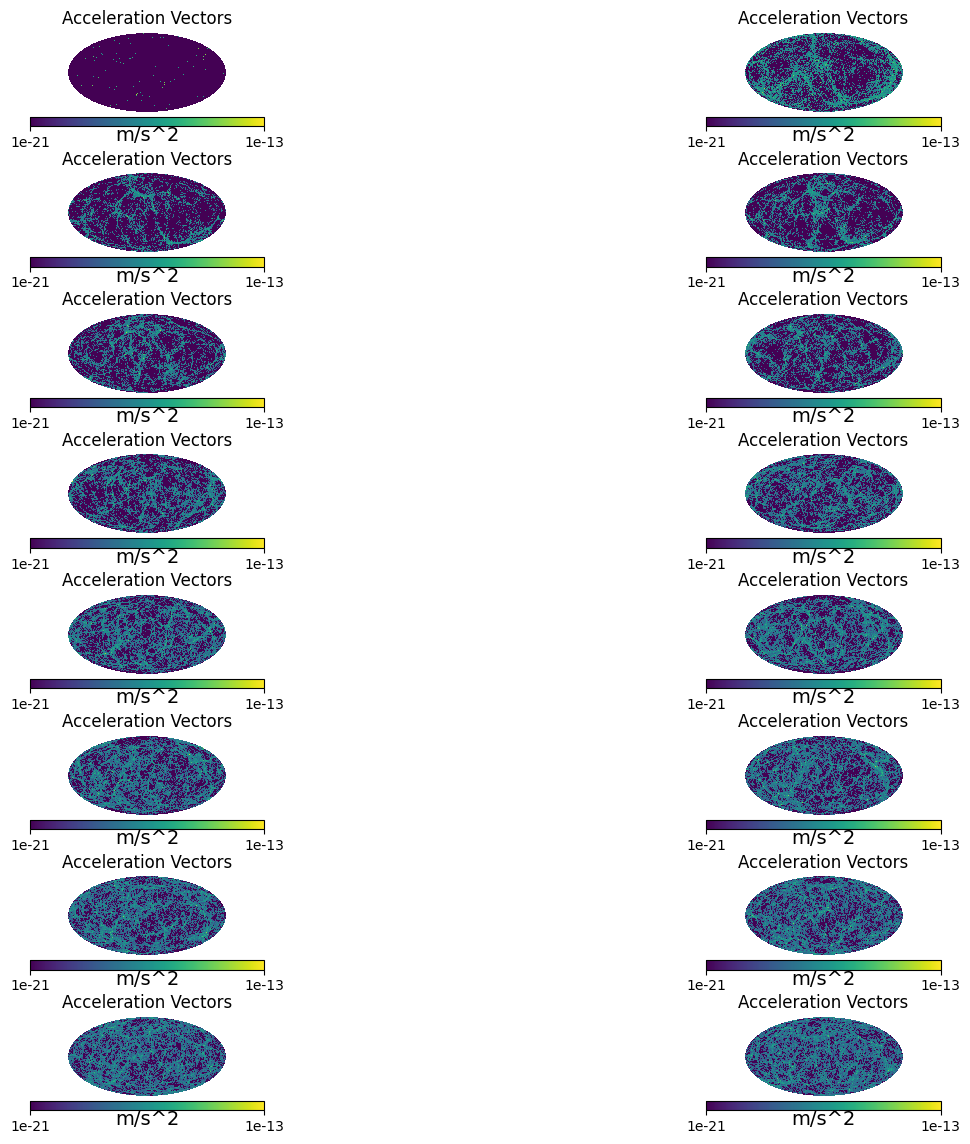

In [183]:
fig, axs = plt.subplots(ncols=2, nrows=8, gridspec_kw={'hspace': 0.5}, figsize=(16,14))
axs = axs.flatten()
for k in range(m):
    pix_indices[k]=hp.pixelfunc.vec2pix(Nside3, list(ac_vec[k][:,0]*u.dimensionless_unscaled),
        list(ac_vec[k][:,1]*u.dimensionless_unscaled),
        list(ac_vec[k][:,2]*u.dimensionless_unscaled))
    counts[k],_=np.histogram(pix_indices[k],bins, weights=ac_scal[k])
    counts[k][counts[k]<=1e-21]=1e-21
    #max_idx[k]=argmax(counts[k])
    mean_val[k]=np.sum(counts[k])/bins
    st_dev[k]=np.sqrt(np.sum((counts[k]-mean_val[k])**2)/bins)
    plt.axes(axs[k])
    hp.mollview(counts[k], norm=matplotlib.colors.LogNorm(), min=1e-21, max=1e-13, title='Acceleration Vectors', unit='m/s^2', badcolor="white",hold=True)
    #plt.plot(mean_valnorm[k][0]*r, mean_valnorm[k][1]*r, color='r', marker='o')
plt.show()

    #print(counts[k])
    #print(pix_indices[k])

In [184]:
#check
#mean_val[1]
np.sum((counts[1]-mean_val[1])**2)
print(np.amax(ac_vec[5]))

1.667634572777741e-15


In [185]:
# calculate pixel size:
pixel_size=4*3.14/(12*Nside3**2)
#in square degrees
print(pixel_size)

0.00025553385416666666


In [186]:
#Now let us calculate acceleration theoretically by omega matter
rho_matter= 2.2*10**(-27) #kg/m^3
steps2=np.array(steps1)
r=steps2*3.08*10**22
print(steps1)
r=np.array(r)
dr=10*3.08*10**22
m_shell=r**2*dr*pixel_size*rho_matter
acceleration=m_shell*G/(r**2)
print(m_shell*G)
print(r**2)
print(acceleration)
##we got that acceleration coinsides more or less than mean value 1-^-16

[10, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
[1.0955926489520834e+30 3.9441335362275014e+31 5.368403979865209e+31
 7.011792953293334e+31 8.874300456511876e+31 1.0955926489520834e+32
 1.3256671052320211e+32 1.5776534144910005e+32 1.8515515767290213e+32
 2.1473615919460835e+32 2.4650834601421872e+32 2.8047171813173335e+32
 3.1662627554715217e+32 3.54972018260475e+32 3.955089462717022e+32
 4.382370595808334e+32]
[9.4864e+46 3.415104000000001e+48 4.6483360000000006e+48 6.071296e+48
 7.683984e+48 9.486400000000002e+48 1.1478544000000003e+49
 1.3660416000000004e+49 1.6032016000000005e+49 1.8593344000000002e+49
 2.1344399999999996e+49 2.4285184e+49 2.741569600000001e+49 3.0735936e+49
 3.424590400000001e+49 3.7945600000000007e+49]
[1.1549087630208334e-17 1.1549087630208334e-17 1.1549087630208332e-17
 1.1549087630208334e-17 1.1549087630208334e-17 1.1549087630208332e-17
 1.1549087630208334e-17 1.1549087630208334e-17 1.1549087630208332e-17
 1.1549087630208332e-17 1.

In [187]:
# check
print(mean_val[1], counts[1])
print(np.sum((counts[1]-mean_val[1])**2))

2.2007021551924533e-17 [8.81114519e-18 1.17438475e-17 1.46196873e-17 ... 1.33736786e-17
 1.03531927e-18 1.68970281e-18]
1.6753260281604386e-26


In [188]:
# check
for k in range (m):
    st_dev[k]=np.sqrt(np.sum((counts[k]-mean_val[k])**2)/bins)
    #print (np.sqrt(np.sum((counts[k]-mean_val[k])**2)/bins))
print(st_dev)  

[2.69002933e-16 5.83820138e-16 1.06610577e-16 3.65474610e-16
 6.81165353e-17 3.67079235e-17 1.12481957e-16 4.79218528e-17
 5.71506471e-17 5.40063808e-17 7.80680869e-17 6.75948824e-17
 5.09206851e-17 4.00114782e-17 4.13265866e-17 2.91161533e-17]


In [189]:
print(st_dev[1])

5.838201375379929e-16


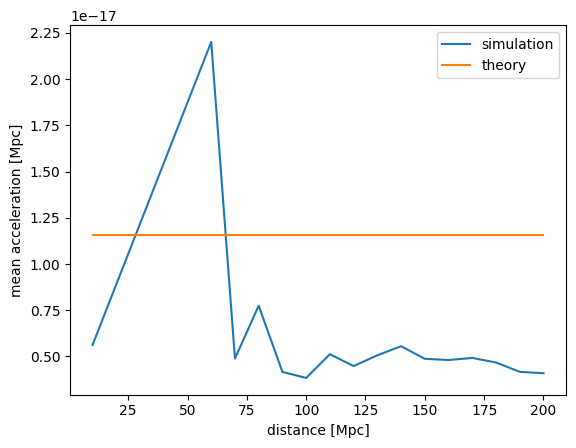

In [190]:
fig,ax=plt.subplots()
plt.plot(steps1, mean_val, label="simulation")
plt.plot(steps1, acceleration, label="theory")
plt.xlabel("distance [Mpc]")
plt.ylabel("mean acceleration [Mpc]")
plt.legend()

Text(0, 0.5, 'standard deviation')

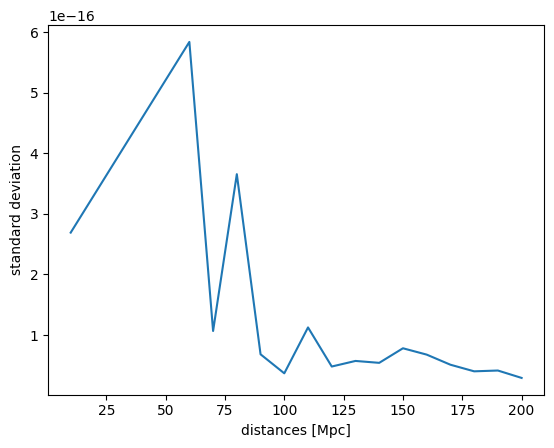

In [191]:
plt.plot(steps1, st_dev)
plt.xlabel("distances [Mpc]")
plt.ylabel("standard deviation")

In [192]:
#cumulative graphs and means

In [193]:
pix_indices2=[[]]*m
counts2=[[]]*m
max_idx2=np.zeros(m)
for i in range(m):
    pix_indices2[i]=np.zeros(j[i])
    counts2[i]=np.zeros(bins)

In [194]:
ac_vec2=[[]]*m
ac_scal2=[[]]*m
s=0
for i in range(m):
    s+=j[i]
    ac_vec2[i]=np.zeros((s,3))
    ac_scal2[i]=np.zeros(s)

In [195]:
i=start
for k in range(1,m+1):
    p=0
    i=start
    while dist[i]  < steps[k]:
        ac_vec2[k-1][p]=(G*m_halo[i]*scale/dist[i]**3)*dist_vec[i] #in m/s^2
        i+=1
        p+=1
        ac_scal2[k-1][p-1]=np.linalg.norm(ac_vec2[k-1][p-1])
        if i>s3-1:
            break

In [196]:
mean_val2=np.zeros(m)
st_dev2=np.zeros(m)

In [197]:
mean_val2=np.zeros((m,3))
mean_valnorm2=np.zeros((m,3))
mean_scal2=np.zeros(m)
for i in range(m):
    mean_val2[i]=(sum(ac_vec2[i]))/j[i]
    #print(mean_valnorm[i])

In [198]:
print(sum(ac_vec2[1]))

[-2.09689765e-13  6.06109018e-14 -2.67099358e-14]


In [199]:
x=np.zeros(m);  ra=np.zeros(m)
y=np.zeros(m);  dec=np.zeros(m)
z=np.zeros(m);  phi=np.zeros(m);  phi_pix=np.zeros(m)
norm=np.zeros(m); theta=np.zeros(m); theta_pix=np.zeros(m)
ipix=np.zeros(m, dtype=int)

In [200]:
a=np.zeros(m, dtype=np.ndarray)
print(type(a[1]))

<class 'int'>


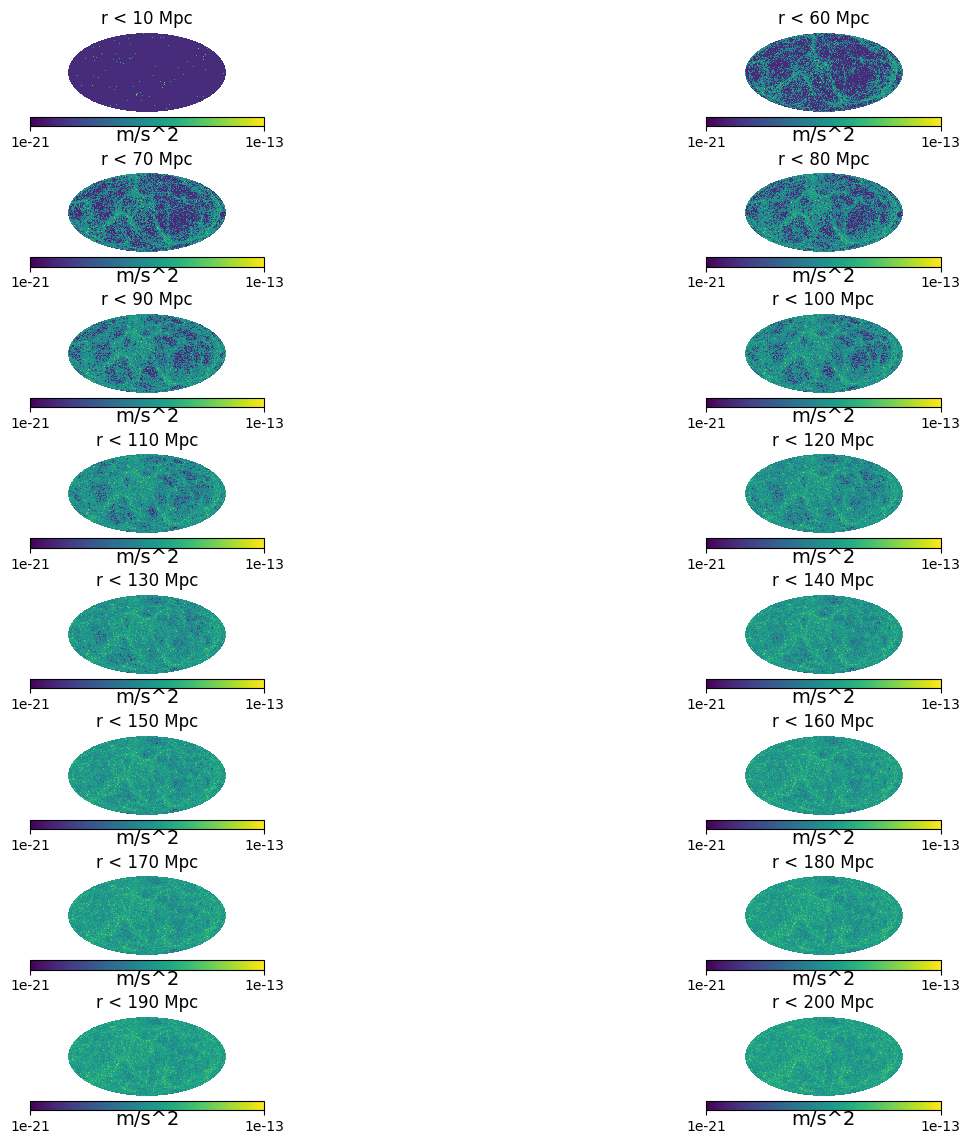

In [201]:
fig, axs = plt.subplots(ncols=2, nrows=8, gridspec_kw={'hspace': 0.5}, figsize=(16,14))
axs = axs.flatten()
for k in range(m):
    pix_indices2[k]=hp.pixelfunc.vec2pix(Nside3, list(ac_vec2[k][:,0]*u.dimensionless_unscaled),
        list(ac_vec2[k][:,1]*u.dimensionless_unscaled),
        list(ac_vec2[k][:,2]*u.dimensionless_unscaled))
    counts2[k],_=np.histogram(pix_indices2[k],bins, weights=ac_scal2[k])
    counts2[k][counts2[k]<=1e-20]=1e-20
    #max_idx[k]=argmax(counts[k])
    plt.axes(axs[k])
    ax=axs[k]
    hp.mollview(counts2[k], norm=matplotlib.colors.LogNorm(), min=1e-21, max=1e-13, title=("r < {} Mpc".format(steps[k+1])),unit='m/s^2', badcolor="white", sub=(1,k,k), hold=True)
    dec[k] = np.arctan(mean_val2[k][2]/(np.sqrt(mean_val2[k][0]**2+mean_val2[k][1]**2)))
    ra[k]=np.arctan(mean_val2[k][1]/mean_val2[k][0])
    theta[k] = np.pi/2.0 - dec[k]
    phi[k] = ra[k]
    #ipix[k] = hp.ang2pix(Nside3, theta[k], phi[k])

# Convert ipix to (theta, phi) coordinates
    #theta_pix[k], phi_pix[k] = hp.pix2ang(Nside3, ipix[k], nest=False)

    #hp.mollview(counts2[k], norm=matplotlib.colors.LogNorm(), min=1e-21, max=1e-13 ,unit='m/s^2', badcolor="white",hold=True)
    #hp.visufunc.projscatter(phi[k], theta[k], color='red', s=10)
    #print(k)
    
    #hp.projscatter(ipix[k], lonra=ra[k]*180.0/np.pi, latdec=dec[k]*180/np.pi, c='o', color='red', s=10)
plt.show()

In [202]:
#check
nside = 16

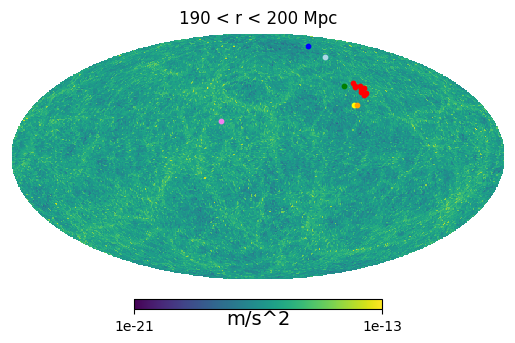

In [203]:
#mean acceleration direction

hp.mollview(counts2[15], norm=matplotlib.colors.LogNorm(), min=1e-21, max=1e-13, title=("{} < r < {} Mpc".format(steps[15],steps[k+1])),unit='m/s^2', badcolor="white",hold=True)
hp.visufunc.projscatter(phi[0], theta[0], color='violet', s=10)
hp.visufunc.projscatter(phi[1], theta[1], color='blue', s=10)
hp.visufunc.projscatter(phi[2], theta[2], color='lightblue', s=10)
hp.visufunc.projscatter(phi[3], theta[3], color='green', s=10)
hp.visufunc.projscatter(phi[4], theta[4], color='yellow', s=10)
hp.visufunc.projscatter(phi[5], theta[5], color='orange', s=10)
hp.visufunc.projscatter(phi[6], theta[6], color='red', s=10)
hp.visufunc.projscatter(phi[7], theta[7], color='red', s=10)
hp.visufunc.projscatter(phi[8], theta[8], color='red', s=10)
hp.visufunc.projscatter(phi[9], theta[9], color='red', s=10)
hp.visufunc.projscatter(phi[10], theta[10], color='red', s=10)
hp.visufunc.projscatter(phi[11], theta[11], color='red', s=10)
hp.visufunc.projscatter(phi[12], theta[12], color='red', s=10)
hp.visufunc.projscatter(phi[13], theta[13], color='red', s=10)
hp.visufunc.projscatter(phi[14], theta[14], color='red', s=10)
hp.visufunc.projscatter(phi[15], theta[15], color='red', s=10)

In [204]:
# now we will plot velocity vector and acceleration vector for r<10 Mpc because in paper velocity is in that shell given
# observation: l=271+=2 degree, b=29+- 1 deg
#SD: l=232 deg, b=7 deg
# b -dec, l - ra

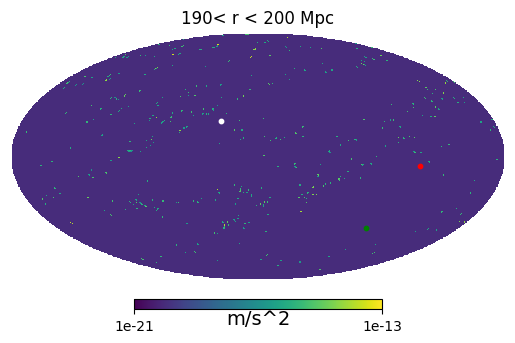

In [205]:
b_vel_obs=29*0.017
l_vel_obs=271*0.017
b_vel_sim=7*0.017
l_vel_sim=232*0.017
theta_vel_obs=np.pi/2.0-b_vel_obs
phi_vel_obs=l_vel_obs
theta_vel_sim=np.pi/2.0-b_vel_sim
phi_vel_sim=l_vel_sim
hp.mollview(counts2[0], norm=matplotlib.colors.LogNorm(), min=1e-21, max=1e-13, title=("{}< r < {} Mpc".format(steps[k],steps[k+1])),unit='m/s^2', badcolor="white",hold=True)
hp.visufunc.projscatter(phi_vel_obs, theta_vel_obs, color='red', s=10)
hp.visufunc.projscatter(phi_vel_sim, theta_vel_sim, color='green', s=10)
hp.visufunc.projscatter(phi[0], theta[0], color='white', s=10)

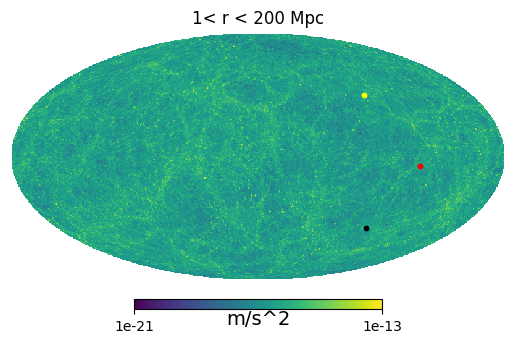

In [210]:
b_vel_obs=29*0.017
l_vel_obs=271*0.017
b_vel_sim=7*0.017
l_vel_sim=232*0.017
theta_vel_obs=np.pi/2.0-b_vel_obs
phi_vel_obs=l_vel_obs
theta_vel_sim=np.pi/2.0-b_vel_sim
phi_vel_sim=l_vel_sim
hp.mollview(counts2[15], norm=matplotlib.colors.LogNorm(), min=1e-21, max=1e-13, title=("{}< r < {} Mpc".format(steps[0], steps[16])),unit='m/s^2', badcolor="white",hold=True)
hp.visufunc.projscatter(phi_vel_obs, theta_vel_obs, color='red', s=10)
hp.visufunc.projscatter(phi_vel_sim, theta_vel_sim, color='black', s=10)
hp.visufunc.projscatter(phi[15], theta[15], color='yellow', s=10)

In [ ]:
#check, it is interesting bit I get the same ratio for each 
for k in range(2):
    #print(mean_val2[k])
    print(mean_val2)
    print((np.arctan(np.sqrt(mean_val2[k][0]**2+mean_val2[k][1]**2))))
    print((mean_val2[k][2]/(np.sqrt(mean_val2[k][0]**2+mean_val2[k][1]**2))))
    

In [ ]:
# set the resolution of the skymap
nside = 64

# define the theta-phi coordinate of the point you want to plot
theta = 0.5  # in radians
phi = 1.2  # in radians

# convert theta-phi coordinates to pixel index
pixel_index = hp.ang2pix(Nside3, theta1, phi1)

# create a map of zeros with nside resolution
skymap = np.zeros(hp.nside2npix(nside))

# set the pixel corresponding to the point to 1
#skymap[pixel_index] = 1

# plot the skymap
hp.mollview(skymap)

# plot the point on the skymap
hp.visufunc.projscatter(phi1, theta1, s=20, c='red', marker='x')

print(theta1, phi1)
# show the plot
plt.show()

In [ ]:
#Plotting mean acceleration 